# Spectrogram Conversation

This notebook explores how to convert audio files into specrograms using the BirdSet datapipeline.

In [2]:
from birdset.datamodule import DatasetConfig
from birdset.datamodule.components.augmentations import PowerToDB
from birdset.datamodule.esc50_datamodule import ESC50DataModule
from birdset.datamodule.components.transforms import BirdSetTransformsWrapper, PreprocessingConfig
from birdset.datamodule.components.resize import Resizer
from torchaudio.transforms import Spectrogram, MelScale

transforms = BirdSetTransformsWrapper(
    task= 'multiclass',
    preprocessing=PreprocessingConfig(
        spectrogram_conversion= Spectrogram(
            n_fft=1024,
            hop_length=320,
            power=2.0,
        ),
        resizer= Resizer(
            db_scale=True,
        ),
        melscale_conversion= MelScale(
            n_mels=128,
            sample_rate=32000,
            n_stft=513
        ),
        dbscale_conversion= PowerToDB(),
        normalize_spectrogram=False,
        normalize_waveform=None
    ),
)


# initiate the data module
dm = ESC50DataModule(
    dataset= DatasetConfig(
        data_dir='../../data_birdset/esc50',
        task="multiclass",
        sampling_rate=32000,
    ),
    transforms= transforms
)

In [9]:
dm.prepare_data()

Repo card metadata block was not found. Setting CardData to empty.


In [10]:
dm.setup(stage="fit")
# get the dataloaders
train_loader = dm.train_dataloader()
# get the first batch
batch = next(iter(train_loader))
# get shape of the batch
print(batch["input_values"].shape)
print(batch["labels"].shape)
#batch

torch.Size([32, 1, 128, 1024])
torch.Size([32])


## Multiple channels

In [3]:
transforms = BirdSetTransformsWrapper(
    task= 'multiclass',
    preprocessing=PreprocessingConfig(
        spectrogram_conversion= [
            Spectrogram(
                n_fft=4410,
                hop_length=320,
                win_length=800,
                power=2.0,
            ),
            Spectrogram(
                n_fft=4410,
                hop_length=800,
                win_length=1600,
                power=2.0,
            ),
            Spectrogram(
                n_fft=4410,
                hop_length=800,
                win_length=3200,
                power=2.0,
            ),
        ],
        resizer= Resizer(
            db_scale=True,
            target_height=128,
            target_width=250,
        ),
        melscale_conversion= [
            MelScale(
                n_mels=128,
                sample_rate=32000,
                n_stft=2206,
            ),
            MelScale(
                n_mels=128,
                sample_rate=32000,
                n_stft=2206,
            ),
            MelScale(
                n_mels=128,
                sample_rate=32000,
                n_stft=2206,
            ),
        ],
        dbscale_conversion= None,
        normalize_spectrogram=False,
        normalize_waveform=None
    ),
)


# initiate the data module
dm = ESC50DataModule(
    dataset= DatasetConfig(
        data_dir='../../data_birdset/esc50',
        task="multiclass",
        sampling_rate=32000,
    ),
    transforms= transforms
)

In [4]:
dm.prepare_data()

Repo card metadata block was not found. Setting CardData to empty.


In [5]:

dm.setup(stage="fit")
# get the dataloaders
train_loader = dm.train_dataloader()
# get the first batch
batch = next(iter(train_loader))
# get shape of the batch
print(batch["input_values"].shape)
print(batch["labels"].shape)
#batch

torch.Size([32, 3, 128, 250])
torch.Size([32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


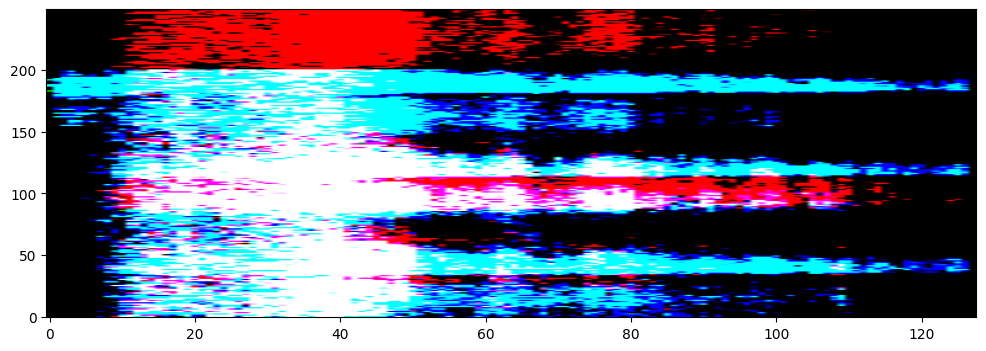

In [31]:
# visualize the first sample from the batch
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
image = batch["input_values"][20].squeeze().numpy().T
plt.imshow(image, aspect='auto', origin='lower')